# CSC/XMM validation catalogs

In [86]:
import sys
sys.path.append('../')

In [87]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


***

In [88]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
1398234,9011,733,609160,158.447969,57.274440,0.272379,0.302260,0.328931,-0.684701,-0.689494,39.775978,245.72354,471.79382,134.08575,23.738163,4.337275,1.060280,0.001440,0.000018,23.893660,23.786650,23.700302,NaN,NaN,18.500810,16.523830,5.916296,3.500030,1.602613,-1.425966,-0.709971,1.509412,1.051738,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.397094,57837.270816,2018-03-17 09:31:48.949,2017-03-25 06:29:58.532,9011_609160_733
312143,9011,2242,620304,159.281774,61.119279,0.182264,0.216517,0.157173,0.807448,-0.800272,34.576843,-1584.33780,803.31020,205.83849,112.418175,4.850353,1.157287,0.000981,0.000012,24.323404,24.144535,24.499695,22.730791,NaN,18.652851,NaN,5.165873,3.106390,1.666466,1.778285,-0.860911,1.082952,-5.436858,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58245.176656,57846.190703,2018-05-07 04:14:23.061,2017-04-03 04:34:36.750,9011_620304_2242
1552461,9011,636,606001,165.298415,56.355088,0.477420,0.164980,0.448253,4.834734,3.497045,5.223960,-49.98391,97.15143,37.87421,66.658030,4.760554,1.193646,0.001215,0.000015,23.264172,24.430435,23.356657,20.786860,21.13939,20.704712,NaN,4.705714,1.015322,3.659734,10.548758,3.820666,0.182126,-0.192242,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,57902.188588,57545.188423,2017-05-29 04:31:34.000,2016-06-06 04:31:19.759,9011_606001_636
332824,9011,3410,619599,159.603102,60.690799,0.151429,0.301188,0.096852,-3.170613,-6.253524,7.638439,368.44824,601.25970,232.70914,142.205180,4.088785,1.092718,0.001144,0.000014,24.518074,23.781750,25.022894,NaN,NaN,20.292253,16.083970,3.713128,4.594571,1.154961,-6.411215,-6.537005,0.258391,1.373170,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58195.364159,57414.406030,2018-03-18 08:44:23.309,2016-01-27 09:44:41.000,9011_619599_3410
1333042,9011,3044,608382,162.105026,56.955115,0.123078,0.647783,0.801914,0.427370,1.278326,-12.446301,2966.62700,340.97632,99.13476,44.694237,4.391996,1.061270,0.001414,0.000017,24.754177,22.957705,22.732004,23.421825,22.23268,NaN,13.819285,2.272702,6.449742,5.361094,0.895642,1.316905,-0.467959,12.396511,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.405780,57784.447720,2018-03-17 09:44:19.410,2017-01-31 10:44:42.972,9011_608382_3044


In [89]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
126674,2CXO J105248.3+571205,163.201600,57.201609,0.780831,0.771557,96.317092,2.166667,134.020454,TRUE,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0.448463,1.254418,NaN,NaN,True
114483,2CXO J103242.9+573159,158.178960,57.533266,2.562384,1.447225,28.282369,3.937500,34.374681,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.941306e-16,7.417414e-16,3.708707e-16,1.094069e-15,1.202263,3.362908,7.417414e-16,5.900782e-16,True
125448,2CXO J104852.8+585405,162.220151,58.901585,0.752823,0.737713,95.673722,7.761134,297.073571,TRUE,False,False,False,False,False,False,False,2.372144e-15,1.815715e-15,2.928573e-15,1.898627e-15,1.453270e-15,2.343983e-15,0.430609,1.204478,4.270771e-15,1.007924e-15,True
121550,2CXO J104504.6+591257,161.269559,59.215914,0.771104,0.747395,5.212490,5.200000,131.098767,TRUE,False,False,False,False,False,False,False,1.261606e-15,7.434464e-16,1.757237e-15,1.338457e-15,9.328637e-16,1.723770e-15,0.438718,1.227161,2.600063e-15,9.094566e-16,True
124205,2CXO J104737.2+591813,161.905065,59.303730,1.200853,0.917908,130.936094,2.324324,18.295699,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,7.471295e-16,0.000000e+00,0.000000e+00,3.761151e-16,0.617502,1.727247,0.000000e+00,8.364599e-16,True


In [90]:
ero_df_orig = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
ero_df = ero_df_orig.copy()

shift = 3*60/3600
rand_ang = np.random.uniform(0, 2*np.pi, len(ero_df))
ero_df['RA_fin'] = ero_df['RA_fin'] + shift*np.cos(rand_ang)/np.cos(np.radians(ero_df['DEC_fin']))
ero_df['DEC_fin'] = ero_df['DEC_fin'] + shift*np.sin(rand_ang)


# #ero_df.sample(5)
# ero_new_cross_ero_old = cross_match_data_frames(ero_df, ero_df_orig, 'RA_fin', 'DEC_fin', 'RA_fin', 'DEC_fin',30, 'ero_old')
# ero_df = ero_df[~ero_df['srcname_fin'].isin(ero_new_cross_ero_old['srcname_fin'])]
ero_df

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,SRGe J103744.3+571156,159.521346,57.181717,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.0,0.0,0.0,1,1,159.436603,57.197499,0.318530,6.785297,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.830700,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.318530,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,SRGe J110137.5+572926,165.432555,57.442488,147.861359,53.996717,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,0.0,0.0,0.0,21,14,165.408362,57.489175,0.433455,41.040825,0.000030,6.268413e+08,6.270701e+08,0.0,0.0,2.156194,0.060969,4.025409,165.406353,57.490464,857143329024245888,7.121849,2,1,10.012074,NaN,0,HD 237963,NaN,Star,7.105646,1,1,0,0,8.146000,8.155000,8.124,47.2,55.3,51.5,1,3,1,1237658302206378052,0,3.844748,64609311305,0.433455,0.766567,1.157204,1.876362,138.528408,46.042071,1.515884e-12,7.056474e+19
2,SRGe J110537.6+585120,166.311717,58.846025,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.0,0.0,0.0,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.0,0.0,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.191000,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261000,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19
3,SRGe J102349.9+563347,155.905251,56.522518,154.343916,50.594493,2.027046,32979.832031,1.001123e-12,4.287407e-14,7451.697754,319.126190,6800.098145,0.0,0.0,0.0,3,2,155.960049,56.561896,0.161150,96.801712,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,1.095822,0.046930,29.139788,155.958041,56.563186,853150108949817088,6.997905,1,0,17.967112,-1.0,0,2MASX J10234977+5633475,0.230353,Seyfert_1,6.999458,1,1,0,1,12.966000,12.035000,9.582,44.0,48.8,32.1,1,1,0,1237655108371152952,9216701424834203648,6.968698,68241429703,0.300000,0.724683,1.093975,1.773840,133.091566,42.558086,7.704034e-13,7.963453e+19
4,SRGe J105057.2+593215,162.836628,59.534746,147.091312,51.565006,2.041233,7492.464844,9.137326e-13,2.094327e-14,4687.587402,107.442131,4686.813965,0.0,0.0,0.0,4,3,162.740153,59.536125,0.226167,3.579206,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,1.000165,0.022924,23.773006,162.738144,59.537414,861390055247564800,5.119823,2,1,18.398899,-1.0,0,2MASX J10505729+5932144,0.085280,Seyfert_1,5.102316,2,1,1,0,12.489000,11.947000,8.799,48.3,51.5,42.9,2,2,0,1237655368746336397,631642530626168832,5.075234,56915973694,0.318686,0.729755,1.101632,1.786255,135.192778,46.969604,7.031529e-13,7.898503e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,SRGe J102315.1+561957,155.879420,56.298692,154.718419,50.650679,12.277468,6.259035,1.637604e-15,6.023096e-16,14.734348,5.419283,8219.958008,0.0,0.0,0.0,8816,7662,155.815079,56.331271,3.503645,66.729698,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.001793,0.000659,31.568741,

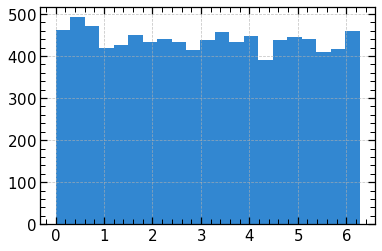

In [91]:
plt.hist(rand_ang);

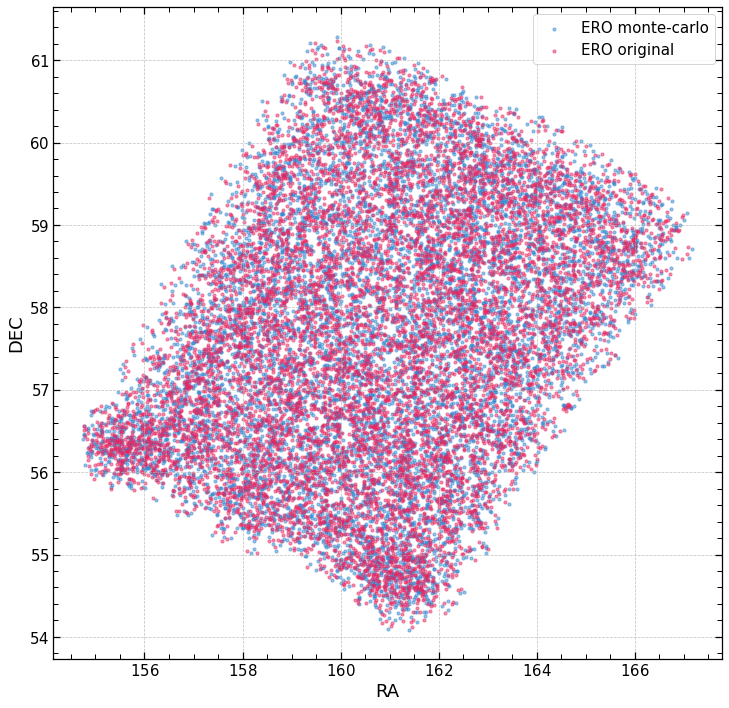

In [92]:
fig,  ax =  plt.subplots( figsize = (12,12))
ax.scatter(ero_df['RA_fin'], ero_df['DEC_fin'], s=10, label='ERO monte-carlo', color = 'C0', alpha = 0.5)
ax.scatter(ero_df_orig['RA_fin'], ero_df_orig['DEC_fin'], s=10, label='ERO original', color = 'C1', alpha = 0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()

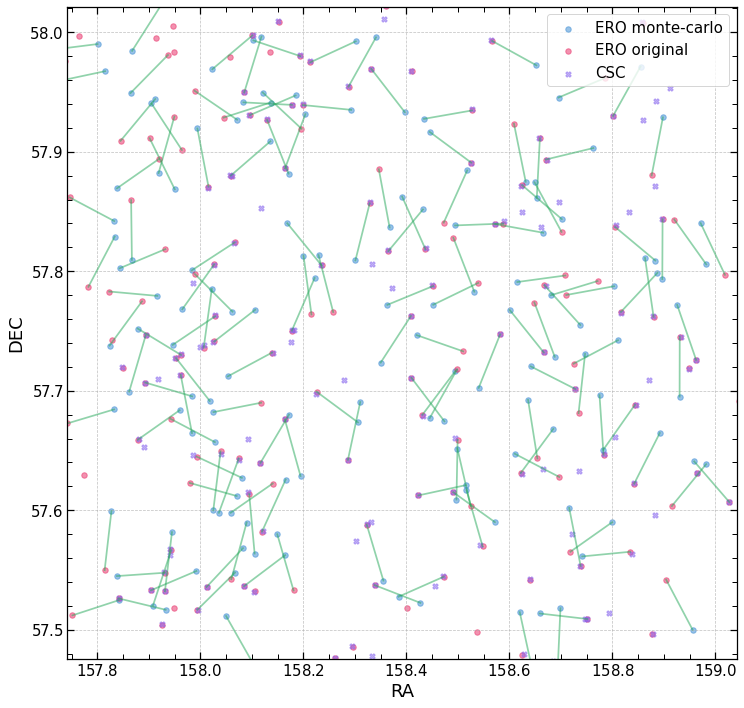

In [94]:
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.set_xlim(160, 161)
#ax.set_ylim(58, 59)

query = f"RA_fin<{159} & RA_fin>{157.8} & DEC_fin<{58.0} & DEC_fin>{57.5}"

df_for_plot = ero_df.query(query)


ax.scatter(df_for_plot['RA_fin'], df_for_plot['DEC_fin'], s=30, label='ERO monte-carlo', color = 'C0', alpha = 0.5)
ax.set_xlim()
ax.set_ylim()
ax.scatter(ero_df_orig['RA_fin'], ero_df_orig['DEC_fin'], s=30, label='ERO original', color = 'C1', alpha = 0.5)

ax.scatter(csc_df.query("flux_05_2>3e-15")['ra'], csc_df.query("flux_05_2>3e-15")['dec'], s=30, label='CSC', color = 'C3', alpha = 0.5, marker = 'X')

for i in range(len(df_for_plot)):
    srcid = df_for_plot.iloc[i]['srcname_fin']
    ra_new = df_for_plot.iloc[i]['RA_fin']
    dec_new = df_for_plot.iloc[i]['DEC_fin']
    ra_old = ero_df_orig.query(f"srcname_fin=='{srcid}'")['RA_fin'].values[0]
    dec_old = ero_df_orig.query(f"srcname_fin=='{srcid}'")['DEC_fin'].values[0]
    ax.plot([ra_new, ra_old], [dec_new, dec_old], color='C2', alpha=0.5)

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()


# CSC

## CSC x ERO cross-match

In [95]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 158 out of 9215 x 2329
	 total unique pairs: 144
	 total non-unique pairs (duplicates in df2): 14
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 99


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
11,SRGe J104929.6+585337,162.353995,58.844726,148.052226,51.872963,2.756458,578.033447,5.937496e-14,3.900784e-15,277.677429,18.242701,4272.526367,0.0,0.0,0.0,231,193,162.375141,58.892450,0.888182,81.642525,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.064991,0.004270,17.645687,162.373133,58.893739,855311233414487040,8.235210,1,0,20.340900,-1.0,0,SDSS J104930.42+585333.7,1.628498,QSO,3.159209,2,1,0,0,14.806000,14.100000,11.187,34.3,27.5,8.0,2,3,1,1237655109446664347,9215722584255254528,3.245741,59286361447,0.888182,0.985452,1.487631,2.412138,135.484393,46.329961,4.569135e-14,8.345062e+19,2CXO J104924.7+585101,162.353037,58.850309,2.614870,2.011511,112.098885,2.971429,13.990754,MARGINAL,False,False,False,False,False,False,True,3.062043e-16,2.551702e-17,5.741330e-16,3.500941e-16,1.441564e-16,5.560318e-16,1.347790,3.769970,6.562984e-16,4.851719e-16,True,20.177546,1,1
154,SRGe J103301.9+574557,158.229392,57.813544,151.658668,50.935947,11.843266,7.462161,3.452516e-15,1.246891e-15,16.202291,5.851529,4287.343262,0.0,0.0,0.0,8306,7160,158.259787,57.764602,5.230803,81.243248,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.003779,0.001365,17.645845,158.257779,57.765891,854804285538908928,9.682121,1,1,20.186892,-1.0,0,CXCCLASXS J103301.9+574557,1.350000,X,6.004000,1,1,0,0,16.740999,16.142000,12.780,14.0,7.0,-0.5,1,3,0,1237655108908745388,0,8.739627,63548220955,5.230803,4.234048,6.391685,10.363877,133.738478,44.225396,2.656845e-15,5.906098e+19,2CXO J103256.8+574908,158.236877,57.818929,2.628528,2.081410,164.613257,1.837838,12.075491,MARGINAL,False,False,False,False,False,False,False,6.602279e-16,2.269534e-16,1.093503e-15,NaN,NaN,NaN,1.369759,3.831422,NaN,NaN,True,24.122362,1,1
109,SRGe J104547.1+591854,161.357665,59.293700,148.071495,51.237425,7.990500,17.558212,5.869157e-15,1.528558e-15,27.382622,7.131505,4262.327637,0.0,0.0,0.0,7184,6062,161.448230,59.313805,3.472119,120.815804,0.000012,6.268413e+08,6.270701e+08,0.0,0.0,0.006424,0.001673,17.014475,161.446221,59.315095,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 369,1.220000,AGN,8.072857,1,1,0,1,17.007000,16.101999,12.205,10.2,6.7,1.2,1,1,0,1237655368746074427,0,7.983752,57729946193,3.472119,2.856658,4.312389,6.992376,134.572673,46.421566,4.516545e-15,8.823820e+19,2CXO J104523.8+591742,161.349169,59.295037,1.573043,1.067425,61.076926,2.263158,14.153212,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.281162e-16,0.776639,2.172375,NaN,NaN,True,16.342601,1,1
101,SRGe J103210.8+575543,158.136226,57.941206,151.558837,50.748048,8.110665,15.980293,6.223527e-15,1.635129e-15,28.988247,7.616186,4255.326660,0.0,0.0,0.0,6685,5589,158.047116,57.927299,3.527484,97.607460,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.006812,0.001790,22.512375,158.045107,57.928589,855009005155642240,9.340548,1,1,15.017202,NaN,0,SDSS J103210.64+575549.0,2.417159,QSO,11.954254,1,1,0,0,13.624000,13.608000,12.128,43.7,34.8,2.7,1,1,1,1237658304352288804,0,9.362702,62924447482,3.527484,2.899618,4.377241,7.097530,133.4859

## CSC x DESI cross-match

In [96]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 451 out of 99 x 2418574
	 total unique pairs: 451
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
1,SRGe J105835.2+564717,164.566836,56.812165,149.206059,54.200177,8.872812,82.931900,2.808731e-13,3.030535e-14,196.387772,21.189638,638.780701,0.0,0.0,0.0,572,473,164.648852,56.786801,3.877599,83.298302,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.307442,0.033172,60.279346,164.646843,56.788090,-1,-1.000000,0,-1,NaN,-1.0,-1,NAME UMA II Cl.I,0.07200,Galaxy,12.686233,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,67351808894,3.877599,3.172091,4.788563,7.764474,138.588111,45.228805,2.161428e-13,8.556663e+19,2CXO J105813.6+564859,164.557071,56.816427,4.000081,1.527087,61.983262,1.950000,13.409470,MARGINAL,False,False,False,False,False,False,False,1.582569e-15,1.507208e-16,3.014417e-15,0.000000e+00,0.000000e+00,1.313499e-15,1.749226,4.892848,1.582569e-15,2.413640e-15,True,24.611244,1,1,9011,4438,607596,164.556548,56.816390,0.400608,0.608386,0.951886,-1.095534,4.131396,-33.641735,208.336650,471.05182,224.500090,80.726400,4.305468,1.120540,0.001649,0.000020,23.455513,23.014166,22.539337,NaN,20.958433,NaN,16.702978,8.694695,9.115643,8.552491,-2.273193,4.373312,-1.366183,0.939297,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.410133,57784.446158,2018-03-17 09:50:35.462,2017-01-31 10:42:28.080,9011_607596_4438,1.040747,4,1
0,SRGe J105835.2+564717,164.566836,56.812165,149.206059,54.200177,8.872812,82.931900,2.808731e-13,3.030535e-14,196.387772,21.189638,638.780701,0.0,0.0,0.0,572,473,164.648852,56.786801,3.877599,83.298302,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.307442,0.033172,60.279346,164.646843,56.788090,-1,-1.000000,0,-1,NaN,-1.0,-1,NAME UMA II Cl.I,0.07200,Galaxy,12.686233,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,67351808894,3.877599,3.172091,4.788563,7.764474,138.588111,45.228805,2.161428e-13,8.556663e+19,2CXO J105813.6+564859,164.557071,56.816427,4.000081,1.527087,61.983262,1.950000,13.409470,MARGINAL,False,False,False,False,False,False,False,1.582569e-15,1.507208e-16,3.014417e-15,0.000000e+00,0.000000e+00,1.313499e-15,1.749226,4.892848,1.582569e-15,2.413640e-15,True,24.611244,1,1,9011,4455,607596,164.558900,56.817342,0.168666,0.609840,3.308141,5.726121,3.091400,24.806026,-464.818660,395.83533,169.155760,57.471140,3.781826,1.094714,0.001629,0.000020,24.394808,23.011616,21.186863,20.603195,21.273289,19.013325,NaN,3.355709,7.931567,25.078924,11.135539,3.234489,1.001299,-2.

In [97]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 51


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
445,SRGe J105323.6+573829,163.323892,57.592972,148.980343,53.102712,9.384750,7.434395,3.403369e-15,1.248665e-15,16.047522,5.887687,4307.709473,0.0,0.0,0.0,8448,7300,163.350176,57.639965,4.111922,105.451553,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.003725,0.001367,22.663109,163.348168,57.641255,-1,-1.000000,0,-1,NaN,-1.0,-1,[BCH2008] 545,NaN,X,4.944703,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,64027562447,4.111922,3.355112,5.064851,8.212464,137.086631,45.561513,2.619025e-15,6.955221e+19,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,57.707508,44.571519,15055.956674,TRUE,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.411369,1.150662,NaN,NaN,True,17.868961,1,1,9011,3809,609950,163.319852,57.597425,23.265120,36.110790,38.392334,65.960780,100.939540,258.830300,1661.89690,202.84106,116.877440,69.511400,2.581155,0.667162,0.001463,0.000018,19.056164,18.587671,18.529188,17.950235,17.488895,16.467258,14.448413,331.347140,390.393280,320.090300,105.972410,82.447420,9.899481,6.966438,PSF,0.160138,20.111822,-0.231871,13.213335,-0.876631,9.584369,G2,854201065972345600,58194.408691,57784.444599,2018-03-17 09:48:30.941,2017-01-31 10:40:13.339,9011_609950_3809,0.144735,4,1,NaN
330,SRGe J104701.2+590649,161.772775,59.064514,148.139760,51.489871,8.329005,12.923547,5.018668e-15,1.425987e-15,23.524872,6.684276,4282.390625,0.0,0.0,0.0,6383,5307,161.757000,59.112384,3.627961,52.987812,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.005493,0.001561,20.527252,161.754991,59.113673,855372977864121216,8.248397,1,0,21.317669,-1.0,0,CLANS 532,2.570000,QSO,7.246801,3,1,1,0,17.170000,17.422001,12.335,9.6,2.0,1.0,1,1,1,1237658304890143414,9215711039383162880,8.099876,58471705787,3.627961,2.977676,4.495076,7.288597,134.924172,46.339432,3.862061e-15,8.504701e+19,2CXO J104704.9+590329,161.770674,59.058223,1.315158,1.140454,89.024148,5.142857,69.018030,TRUE,False,False,False,False,False,False,False,1.875319e-16,1.704836e-17,3.580155e-16,1.581364e-15,1.261087e-15,1.901640e-15,0.711172,1.989254,1.768896e-15,5.131111e-16,True,22.976897,1,1,9011,829,614517,161.770754,59.058031,10.690378,29.735556,57.341480,104.748020,95.241920,667.990970,-14555.45200,115.66517,23.743008,13.718684,1.930581,0.624103,0.000922,0.000013,19.895758,18.795416,18.091862,17.447817,

***

# 4XMM DR10

In [98]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
254795,201237001010033,4XMM J105144.7+572808,162.936441,57.468966,0.215975,245.4660,1.078710e-15,7.135620e-17,1.789080e-15,8.507800e-17,2.348030e-15,1.038040e-16,3.025420e-15,2.177540e-16,3.903370e-15,8.970990e-16,1.414560e-14,9.782160e-16,8.012870e-15,2.282040e-16,1.029540e-14,6.193540e-15,3.874700e-14,1.501910e-14,0.239285,0.035287,0.072281,0.030503,-0.256635,0.033470,-0.351898,0.057183,0.0,NaN,0.790268,0.020398,False,1,51661.149132,52615.192419,0.494638,0.177526,15,False,http://xmm-catalog.irap.omp.eu/source/20123700...,4.137110e-15,1.342145e-16,0.153158,0.428406,True
253235,205562114010045,4XMM J104857.1+591127,162.237961,59.190955,1.461140,23.0383,9.099370e-16,5.762980e-16,2.692500e-15,9.343830e-16,2.790060e-15,1.094230e-15,1.159890e-15,1.575560e-15,5.978910e-15,1.912960e-14,1.652910e-14,1.934660e-14,1.130460e-14,2.583060e-15,1.652910e-14,1.934660e-14,1.652910e-14,1.934660e-14,0.674666,0.163080,-0.085553,0.192948,-0.547289,0.302267,0.363054,0.582523,0.0,NaN,-0.823505,NaN,NaN,0,54790.964190,54791.066424,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,5.482560e-15,1.438892e-15,1.036164,2.898306,True
241234,205562139010003,4XMM J102113.3+610927,155.305516,61.157624,1.639020,59.7935,5.275310e-15,3.384310e-15,1.473880e-14,4.471390e-15,1.556690e-14,4.282660e-15,2.207530e-15,4.210430e-15,4.905660e-14,3.373230e-14,9.326630e-14,3.491210e-14,4.472960e-14,8.982710e-15,9.326630e-14,3.491210e-14,9.326630e-14,3.491210e-14,0.610542,0.221805,0.024397,0.193190,-0.830436,0.187769,0.350794,0.520078,0.0,NaN,-1.302260,NaN,NaN,0,54615.399954,54615.499676,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556213...,3.030570e-14,6.191487e-15,1.162307,3.251147,True
252250,205541201010071,4XMM J104607.6+584843,161.531824,58.812007,1.057270,28.0750,3.931310e-16,1.793260e-16,6.550710e-16,2.420580e-16,2.015130e-15,3.954670e-16,1.037150e-15,6.369620e-16,5.747930e-15,5.176980e-15,1.240450e-14,5.301240e-15,4.948630e-15,7.809940e-16,9.319050e-15,6.212280e-15,2.067100e-14,1.016850e-14,0.410087,0.158957,0.395366,0.147154,-0.655271,0.134963,0.344734,0.284106,0.0,NaN,-0.620705,NaN,NaN,0,54750.880949,54781.372685,NaN,NaN,2,False,http://xmm-catalog.irap.omp.eu/source/20554120...,2.670201e-15,4.636661e-16,0.749761,2.097193,True
253176,205562114010013,4XMM J104847.6+591619,162.198551,59.271973,0.951843,119.1240,2.475580e-15,7.455450e-16,3.552270e-15,9.275440e-16,9.862700e-15,1.647680e-15,9.490550e-15,2.947360e-15,9.840580e-15,1.060150e-14,3.811640e-14,1.180300e-14,2.462120e-14,3.071210e-15,3.811640e-14,1.180300e-14,3.811640e-14,1.180300e-14,0.230030,0.169712,0.417143,0.118589,-0.552960,0.123048,-0.319624,0.270005,0.0,NaN,-1.443640,NaN,NaN,0,54790.964190,54791.066424,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,1.341497e-14,1.890817e-15,0.674997,1.888068,True


## XMM x eROSITA cross-match

In [99]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 164 out of 9215 x 1791
	 total unique pairs: 156
	 total non-unique pairs (duplicates in df2): 8
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 97


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
134,SRGe J105238.7+573324,163.162332,57.506597,149.197256,53.086990,8.240727,10.790384,4.096351e-15,1.300774e-15,19.406393,6.162395,4328.078613,0.0,0.0,0.0,8089,6946,163.163127,57.555303,3.587355,94.434921,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.004484,0.001424,21.092207,163.161119,57.556593,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J105238.0+573322,0.707,AGN,8.637841,1,1,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1,1237658302742725830,0,8.425866,64353617720,3.587355,2.946116,4.447433,7.211346,137.032233,45.435976,3.152302e-15,6.866048e+19,201237002010131,4XMM J105241.6+573038,163.173621,57.510727,0.370521,72.9730,1.170300e-16,3.172350e-17,4.541790e-16,4.778460e-17,6.671620e-16,5.966980e-17,1.201460e-15,1.421790e-16,1.179350e-15,4.189080e-16,4.918870e-15,4.964450e-16,3.072270e-15,1.498760e-16,2.729660e-15,1.208180e-15,9.013460e-15,5.288220e-15,0.531413,0.069253,0.108189,0.055632,-0.219907,0.055125,-0.524043,0.072869,0.0,NaN,1.58522,0.309577,False,1,51663.143727,52615.192419,0.269743,0.469509,10,False,http://xmm-catalog.irap.omp.eu/source/20123700...,1.121341e-15,7.644510e-17,0.262754,0.734963,True,26.413415,1,1
58,SRGe J104713.2+571646,161.867511,57.316185,150.346336,52.726609,6.518820,26.760244,8.272245e-15,1.781692e-15,37.518627,8.080832,4143.535156,0.0,0.0,0.0,4104,3290,161.807042,57.278025,2.789021,157.708618,0.000012,6.268413e+08,6.270701e+08,0.0,0.0,0.009055,0.001950,18.303656,161.805033,57.279315,854224400530619264,4.387237,1,0,20.47891,-1.0,0,SDSS J104713.38+571644.9,2.309,QSO,4.386110,1,0,0,1,17.822001,16.989000,12.834,5.6,1.3,-0.2,1,1,1,1237658302742397314,9215535667278532608,4.293660,65427877234,2.789021,2.330522,3.518138,5.704528,136.370831,44.809589,6.365815e-15,6.849552e+19,205562116010025,4XMM J104727.0+571831,161.862696,57.308639,1.771980,38.1592,5.045620e-15,1.684230e-15,9.830830e-15,2.673970e-15,4.021080e-15,1.951850e-15,6.054750e-15,5.023300e-15,6.927290e-14,5.399080e-14,1.068070e-13,5.472170e-14,2.577870e-14,6.032720e-15,1.068070e-13,5.472170e-14,1.068070e-13,5.472170e-14,0.299822,0.179718,-0.580108,0.161433,-0.340555,0.360543,0.478770,0.355806,0.0,NaN,3.07447,NaN,NaN,1,54799.044537,54799.125949,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,1.385191e-14,3.310564e-15,1.256596,3.514886,True,28.733816,1,1
40,SRGe J104928.2+591031,162.419351,59.132929,147.723288,51.678375,5.871847,50.244205,1.152750e-14,1.963564e-15,55.185795,9.400205,4373.606445,0.0,0.0,0.0,2834,2258,162.369567,59.174015,2.484546,60.057938,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.012618,0.002149,18.639521,162.367559,59.175305,855329714657668224,6.867782,1,0,20.31814,-1.0,0,SDSS J104928.20+591032.6,2.190,QSO,6.864744,1,1,0,1,16.7850

## XMM x DESI cross-match

In [100]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 383 out of 97 x 2418574
	 total unique pairs: 383
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
1,SRGe J105130.7+573439,162.785918,57.569462,149.342543,52.961052,2.257549,2212.055908,1.739729e-13,6.520843e-15,817.915283,30.657053,4295.108398,0.0,0.0,0.0,59,44,162.879976,57.576189,0.536485,1.125776,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.190429,0.007138,17.990770,162.877967,57.577478,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,10.042,9.858,9.672,47.6,53.9,26.4,1,0,-1,0,0,NaN,64273280473,0.536485,0.807089,1.218375,1.975550,136.834330,45.371246,1.338790e-13,6.925637e+19,201237001010075,4XMM J105108.2+573345,162.784394,57.562602,0.200577,1160.7600,1.570800e-15,1.104310e-16,3.672040e-15,1.503010e-16,6.971040e-15,2.219010e-16,1.194860e-14,5.285050e-16,2.438840e-14,2.743510e-15,5.214590e-14,2.846100e-15,2.249970e-14,4.771970e-16,3.265850e-14,1.561740e-14,6.630350e-14,3.338170e-14,0.423498,0.029839,0.259774,0.022347,-0.225201,0.024106,-0.269018,0.044925,0.0,NaN,-0.546553,0.032704,False,1,51661.149132,52615.192419,0.539340,0.213481,14,False,http://xmm-catalog.irap.omp.eu/source/20123700...,1.064308e-14,2.680120e-16,0.142239,0.397863,True,24.868910,1,1,9011,2904,609949,162.784545,57.562606,0.327971,0.878999,1.979374,17.696264,19.697834,37.514290,378.114650,422.02325,142.95830,98.036360,3.834036,0.981053,0.001469,0.000018,23.683044,22.621593,21.748367,19.378729,19.262990,18.564302,16.055864,6.737571,10.509771,19.598442,34.650517,19.510336,1.437651,1.604738,REX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,58194.404310,57784.444599,2018-03-17 09:42:12.399,2017-01-31 10:40:13.339,9011_609949_2904,0.290938,3,1
2,SRGe J105130.7+573439,162.785918,57.569462,149.342543,52.961052,2.257549,2212.055908,1.739729e-13,6.520843e-15,817.915283,30.657053,4295.108398,0.0,0.0,0.0,59,44,162.879976,57.576189,0.536485,1.125776,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.190429,0.007138,17.990770,162.877967,57.577478,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,10.042,9.858,9.672,47.6,53.9,26.4,1,0,-1,0,0,NaN,64273280473,0.536

In [101]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 48


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
119,SRGe J104302.3+582613,160.822702,58.474532,149.503827,51.551019,7.021905,33.571564,9.983034e-15,2.739947e-15,47.199615,12.954425,4319.399902,0.0,0.0,0.0,2842,2265,160.761691,58.435668,3.023755,60.730377,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.010927,0.002999,19.195648,160.759682,58.436957,855190523357737088,5.385967,1,0,21.118435,-1.0,0,SDSS J104302.29+582611.9,0.933233,QSO,5.385646,1,1,0,1,16.356001,15.462000,12.274,18.0,12.0,1.8,1,1,1,1237658304352944570,9215683276714561536,5.399017,60996126203,3.023755,2.510379,3.789648,6.144772,134.827352,45.491144,7.682334e-15,7.547767e+19,205562113010029,4XMM J104318.0+582806,160.825136,58.468604,1.636100,28.2525,1.108680e-15,5.370310e-16,3.498130e-15,9.431780e-16,3.368880e-16,4.088630e-16,1.508520e-15,1.530640e-15,2.157680e-15,7.821610e-15,1.231700e-14,8.240840e-15,7.590200e-15,1.888900e-15,1.231700e-14,8.240840e-15,1.231700e-14,8.240840e-15,0.336005,0.200701,-0.594071,0.148382,-0.778811,0.234059,-0.305528,1.013720,0.0,NaN,-0.891125,NaN,NaN,0,54790.834549,54790.915961,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,3.835018e-15,1.027985e-15,1.160237,3.245355,True,21.826446,1,1,9011,2896,613013,160.824703,58.468683,57.275387,249.132170,1447.524500,1381.705700,931.212500,226.357440,-600.35114,92.822586,15.206841,0.029407,0.302691,0.171761,0.001505,0.000019,18.076220,16.489485,14.587561,14.647309,15.076364,16.612797,NaN,551.816700,971.514500,248.228600,760.178200,385.932620,8.781394,-2.627519,PSF,9.722960,256.641630,-23.961140,198.204860,34.425285,137.590560,G2,855190699452263040,58194.399976,57846.195226,2018-03-17 09:35:57.931,2017-04-03 04:41:07.530,9011_613013_2896,0.864645,4,1,0.499200
359,SRGe J104954.5+592312,162.455575,59.435464,147.414186,51.573652,10.303895,7.151571,3.509537e-15,1.289774e-15,16.589792,6.096838,4318.556641,0.0,0.0,0.0,8662,7510,162.478892,59.385366,4.531294,120.184570,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.003842,0.001412,19.058025,162.

# Joining CSC and XMM counterparts

In [102]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [103]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 48
CSC companions 51
Total companions possible 99


In [104]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [105]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 36
CSC companions 23
Total companions possible 59


In [106]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')
print('len when sep/err > 3 ', final_ctps.query('sep_ero_desi/pos_sigma_2d>3').shape[0])

#final_ctps

len when sep/err > 3  50


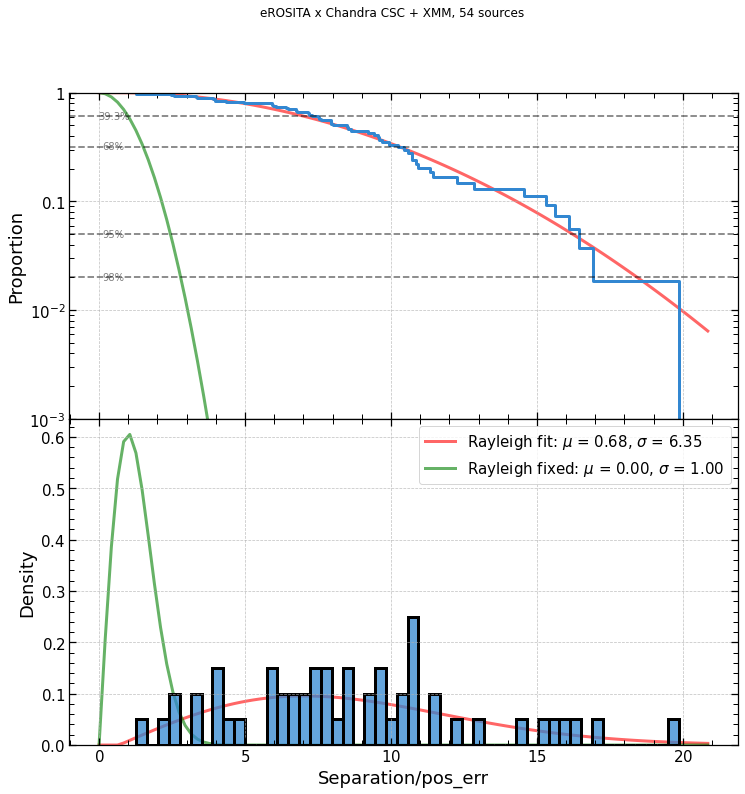

In [107]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
#rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 15)')



[0.05649336]
Number of false companions 50.84401991536151


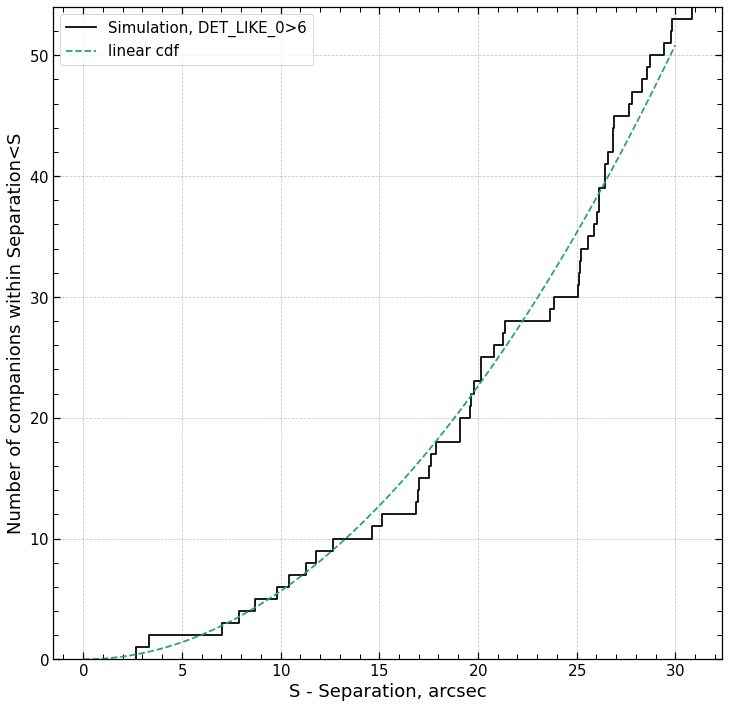

In [110]:
query = 'DET_LIKE_0>6'
seps = final_ctps.query(query)['sep_ero_desi']

sep_bins = np.linspace(0, 30, 300)

sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
sep_hist = np.cumsum(sep_hist)
hist_area = sep_hist
sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Simulation, '+query )
ax.set_xlabel('S - Separation, arcsec')
ax.set_ylabel('Number of companions within Separation<S')


from scipy.optimize import curve_fit
from scipy import stats

def linear_cdf(x,a):
    #b = -60*a
    #return a*x**2+b*x
    return a*x**2

#[4.65170706e+03 3.51493202e+00 2.14801955e+00 9.63700566e+00]
popt, pcov = curve_fit(linear_cdf, sep_axis, hist_area, p0=[0])
print(popt)
x = np.linspace(0, 30, 100)
ax.plot(x, linear_cdf(x, *popt), 'C2--', label = 'linear cdf')
ax.legend()
n_false  =linear_cdf(30, *popt)

print('Number of false companions', n_false)
